In [1]:
import scipy.stats as st
import pandas as pd 
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from pylab import mpl 
import numpy as np
mpl.rcParams['font.sans-serif'] = ['SimHei'] # 指定默认字体 
mpl.rcParams['axes.unicode_minus'] = False
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from tqdm import tqdm


In [2]:
df1 = pd.read_csv('data/file1.csv')
df4 = pd.read_csv('data/file4.csv')

In [3]:
df_11 = df1[['carid','price']]
df4 = df_11.merge(df4,on='carid')

# 1 数据预处理

In [4]:
df_trans = df4[df4.withdrawDate.notna()]
df_trans.shape

(8000, 7)

## 1.1 计算交易周期

In [5]:
df_trans['pushDate'] = pd.to_datetime(df_trans['pushDate'])
df_trans['withdrawDate'] = pd.to_datetime(df_trans['withdrawDate'])
trans_circle = pd.DataFrame(df_trans['withdrawDate'] - df_trans['pushDate'])
df_trans['transcycle'] = trans_circle[0]

In [6]:
trans_circle

,0
0,28 days
1,1 days
2,19 days
3,0 days
4,55 days
...,...
7995,2 days
7996,2 days
7997,7 days
7998,19 days


In [7]:
df_trans.T

,0,1,2,3,4,5,6,7,8,9,...,7990,7991,7992,7993,7994,7995,7996,7997,7998,7999
carid,2,6,7,10,12,13,14,18,22,23,...,74067,74071,74073,74074,74091,74096,74116,74136,74140,74156
price,7.38,4.38,5.9,1.49,0.3,5.95,1.18,4.98,6.5,4.15,...,26.8,3.8,67.98,7.7,8.65,10.98,3.2,13.5,14.3,54.0
pushDate,2021-06-25 00:00:00,2021-06-29 00:00:00,2021-06-30 00:00:00,2021-06-08 00:00:00,2021-04-22 00:00:00,2021-07-10 00:00:00,2021-07-30 00:00:00,2021-05-30 00:00:00,2021-06-12 00:00:00,2021-07-21 00:00:00,...,2020-07-20 00:00:00,2020-04-25 00:00:00,2021-02-20 00:00:00,2020-09-28 00:00:00,2021-03-13 00:00:00,2021-07-08 00:00:00,2021-04-17 00:00:00,2021-01-20 00:00:00,2020-12-25 00:00:00,2020-08-05 00:00:00
pushPrice,7.38,4.38,5.9,1.49,0.88,6.0,1.18,4.98,6.5,4.38,...,27.6,4.0,67.98,9.6,8.65,10.98,3.2,13.5,14.5,59.99
updatePriceTimeJson,{},{},{},{},"""{""""2021-04-26"""": """"0.78"""", """"2021-06-15"""": """"...","""{""""2021-07-17"""": """"5.95""""}""",{},{},{},"""{""""2021-07-27"""": """"4.2"""", """"2021-07-28"""": """"4...",...,"""{""""2020-07-21"""": """"26.8""""}""","""{""""2020-06-04"""": """"3.8""""}""",{},"""{""""2020-11-19"""": """"7.7""""}""",{},{},{},{},"""{""""2020-12-26"""": """"14.3""""}""","""{""""2020-08-13"""": """"54""""}"""
pullDate,2021-07-23,2021-06-30,2021-07-19,2021-06-08,2021-06-16,2021-07-25,2021-08-02,2021-06-01,2021-06-15,2021-09-07,...,2020-07-23,2020-07-03,2021-03-01,2020-12-05,2021-03-25,2021-07-10,2021-04-19,2021-01-27,2021-01-13,2020-08-21
withdrawDate,2021-07-23 00:00:00,2021-06-30 00:00:00,2021-07-19 00:00:00,2021-06-08 00:00:00,2021-06-16 00:00:00,2021-07-25 00:00:00,2021-08-02 00:00:00,2021-06-01 00:00:00,2021-06-15 00:00:00,2021-09-07 00:00:00,...,2020-07-23 00:00:00,2020-07-03 00:00:00,2021-03-01 00:00:00,2020-12-05 00:00:00,2021-03-25 00:00:00,2021-07-10 00:00:00,2021-04-19 00:00:00,2021-01-27 00:00:00,2021-01-13 00:00:00,2020-08-21 00:00:00
transcycle,28 days 00:00:00,1 days 00:00:00,19 days 00:00:00,0 days 00:00:00,55 days 00:00:00,15 days 00:00:00,3 days 00:00:00,2 days 00:00:00,3 days 00:00:00,48 days 00:00:00,...,3 days 00:00:00,69 days 00:00:00,9 days 00:00:00,68 days 00:00:00,12 days 00:00:00,2 days 00:00:00,2 days 00:00:00,7 days 00:00:00,19 days 00:00:00,16 days 00:00:00


In [8]:
# 转为整型
sep = df_trans['transcycle'].astype(str).str.split(' ', expand=True)
df_trans['transcycle'] = sep[0].astype(int)
df4['transcycle'] = sep[0].astype(int)

In [9]:
df4[df4['transcycle']<7].shape[0]

2424

In [10]:
# 取file4中与file1中相同cardid的数据
trans_circle_info = df1[df1.carid.isin(df4.carid.tolist())]
# trans_circle_info.info()

In [11]:
# sns.set_style('darkgrid', {'font.sans-serif': 'simhei'})
# plt.hist(df4['transcycle'], orientation = 'vertical',histtype='bar', color='purple')

In [12]:
df5 = df4[['carid','transcycle']]

In [13]:
NEW_trans_circle = trans_circle_info.merge(df5,on='carid')
NEW_trans_circle

,carid,tradeTime,brand,serial,model,mileage,color,cityId,carCode,transferCount,...,anonymousFeature8,anonymousFeature9,anonymousFeature10,anonymousFeature11,anonymousFeature12,anonymousFeature13,anonymousFeature14,anonymousFeature15,price,transcycle
0,2,2021-06-25,2,2,2,8.60,1,2,1.0,0,...,2.0,4.0,3.0,1+2,4630*1775*1480,201609.0,2,NaN,7.38,28.0
1,6,2021-06-29,6,6,6,6.04,1,3,1.0,3,...,2.0,5.0,2.0,1,4500*1834*1707,201608.0,2,NaN,4.38,1.0
2,7,2021-06-30,7,7,7,5.70,4,1,2.0,2,...,1.0,5.0,2.0,1,4315*1783*1606,201204.0,1,NaN,5.90,19.0
3,10,2021-06-08,2,10,10,13.02,1,2,3.0,1,...,1.0,4.0,3.0,1,4285*1690*1450,NaN,1,NaN,1.49,0.0
4,12,2021-06-16,10,12,12,7.03,5,3,2.0,0,...,1.0,5.0,3.0,NaN,4150*1640*1535,201005.0,2,NaN,0.30,55.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,46121,2020-05-25,8,8,8,10.00,5,1,2.0,0,...,1.0,4.0,3.0,NaN,4415*1674*1415,201003.0,2,NaN,2.80,NaN
9996,8883,2021-03-20,12,275,2606,9.21,1,1,1.0,1,...,1.0,5.0,2.0,1+2,4845*1805*1695,201507.0,1,NaN,18.60,NaN
9997,63828,2021-05-26,20,209,11210,4.17,5,1,1.0,0,...,2.0,5.0,NaN,1+2,4449*1804*1535,201903.0,2,NaN,19.30,NaN
9998,5526,2020-12-17,1,59,1994,4.80,1,16,1.0,0,...,1.0,5.0,2.0,1,4032*1680*1470,201609.0,2,NaN,2.44,NaN


## 1.2 交易周期分桶

In [14]:
# 分成三类，没卖出去，为一类
NEW_trans_circle.loc[NEW_trans_circle[NEW_trans_circle['transcycle']<= 7].index, 'trans_category'] = 1
NEW_trans_circle.loc[NEW_trans_circle[(NEW_trans_circle['transcycle']> 7) & (NEW_trans_circle['transcycle']<=14)].index, 'trans_category'] = 2
NEW_trans_circle.loc[NEW_trans_circle[(NEW_trans_circle['transcycle']> 14 ) & ( NEW_trans_circle['transcycle']<=21)].index, 'trans_category'] = 3
NEW_trans_circle.loc[NEW_trans_circle[(NEW_trans_circle['transcycle']> 21 ) & ( NEW_trans_circle['transcycle']<=28)].index, 'trans_category'] = 4
NEW_trans_circle.loc[NEW_trans_circle[(NEW_trans_circle['transcycle']> 28 ) & ( NEW_trans_circle['transcycle']<=35)].index, 'trans_category'] = 5
NEW_trans_circle.loc[NEW_trans_circle[(NEW_trans_circle['transcycle']> 35 ) & ( NEW_trans_circle['transcycle']<=42)].index, 'trans_category'] = 6
NEW_trans_circle.loc[NEW_trans_circle[NEW_trans_circle['transcycle']> 42].index, 'trans_category'] = 7


In [15]:
# 没卖出去的，交易周期编码为0
NEW_trans_circle['trans_category'] = NEW_trans_circle['trans_category'].fillna(0)
# 缺失值处理，以众数填充
NEW_trans_circle['carCode'] = NEW_trans_circle['carCode'].fillna(1)
NEW_trans_circle['maketype'] = NEW_trans_circle['maketype'].fillna(2)


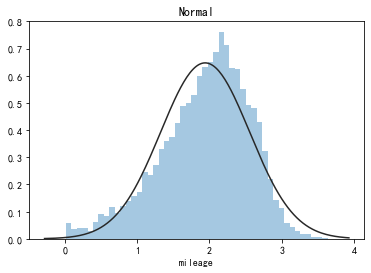

In [16]:
plt.title('Normal')
sns.distplot(np.log1p(NEW_trans_circle['mileage']), kde=False, fit=st.norm)
plt.savefig('data/1.png')

In [17]:
cols = ["carid", "tradeTime", "brand", "serial", "model", "mileage", "color", "cityId", "carCode", "transferCount", "seatings", "registerDate",
        "licenseDate", "country", "maketype", "modelyear", "displacement", "gearbox", "oiltype", "newprice", "price","trans_category"]
df = NEW_trans_circle[cols]


## 1.3 缺失值处理

In [18]:
# 以下分类特征全部填充众数
df['carCode'] = df['carCode'].fillna(1)
df['modelyear'] = df['modelyear'].fillna(2017)
df['country'] = df['country'].fillna(779412)
df['maketype'] = df['maketype'].fillna(2)
df['gearbox'] = df['gearbox'].fillna(3)

## 1.4 提取时间特征

In [19]:
# # 时间处理(提取年月日)
df['tradeTime'] = pd.to_datetime(df['tradeTime'])
df['registerDate'] = pd.to_datetime(df['registerDate'])
df['licenseDate'] = pd.to_datetime(df['licenseDate'])


df['tradeTime_year'] = df['tradeTime'].dt.year
df['tradeTime_month'] = df['tradeTime'].dt.month
df['tradeTime_day'] = df['tradeTime'].dt.day

df['registerDate_year'] = df['registerDate'].dt.year
df['registerDate_month'] = df['registerDate'].dt.month
df['registerDate_day'] = df['registerDate'].dt.day

df['licenseDate_year'] = df['licenseDate'].dt.year
df['licenseDate_month'] = df['licenseDate'].dt.month
df['licenseDate_day'] = df['licenseDate'].dt.day

del df['tradeTime']
del df['registerDate']
del df['licenseDate']


## 1.5 车辆分类（高中低）

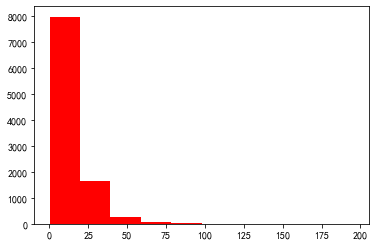

In [20]:
y_p = df[df['price'] <= 200]
## 3) 查看预测值的具体频数
plt.hist(y_p['price'], orientation='vertical',
         histtype='bar', color='red')
plt.savefig('data/price_bar1.png')
plt.show()

In [21]:
df.loc[df[df['price']<= 25].index, 'car_category'] = 0 # 低端车
df.loc[df[(df['price']> 25)&(df['price']<= 50)].index, 'car_category'] = 1 # 中端车
df.loc[df[df['price']> 50].index, 'car_category'] = 2 # 高端车

## 1.5 数据分布的转换

In [22]:
# 删除训练集中异常值
# df_train = train.drop(train[abs(train['newprice']-train['price']) > 100].index)
df_a = df.copy()
df_a['price'] = np.log1p(df_a['price'])
df_a['newprice'] = np.log1p(df_a['newprice'])
df_a


,carid,brand,serial,model,mileage,color,cityId,carCode,transferCount,seatings,...,tradeTime_year,tradeTime_month,tradeTime_day,registerDate_year,registerDate_month,registerDate_day,licenseDate_year,licenseDate_month,licenseDate_day,car_category
0,2,2,2,2,8.60,1,2,1.0,0,5,...,2021,6,25,2016,12,1,2017,3,21,0.0
1,6,6,6,6,6.04,1,3,1.0,3,5,...,2021,6,29,2016,8,1,2016,9,9,0.0
2,7,7,7,7,5.70,4,1,2.0,2,5,...,2021,6,30,2012,8,1,2012,8,28,0.0
3,10,2,10,10,13.02,1,2,3.0,1,5,...,2021,6,8,2006,10,1,2006,11,27,0.0
4,12,10,12,12,7.03,5,3,2.0,0,5,...,2021,6,16,2011,10,1,2012,3,13,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,46121,8,8,8,10.00,5,1,2.0,0,5,...,2020,5,25,2012,6,1,2012,8,17,0.0
9996,8883,12,275,2606,9.21,1,1,1.0,1,7,...,2021,3,20,2016,11,1,2016,12,6,0.0
9997,63828,20,209,11210,4.17,5,1,1.0,0,5,...,2021,5,26,2018,11,1,2019,2,18,0.0
9998,5526,1,59,1994,4.80,1,16,1.0,0,5,...,2020,12,17,2016,9,1,2016,10,12,0.0


In [23]:
df_a[df_a['trans_category'] == 1].shape

(2744, 29)

In [24]:
df_a.isnull().any()

carid                 False
brand                 False
serial                False
model                 False
mileage               False
color                 False
cityId                False
carCode               False
transferCount         False
seatings              False
country               False
maketype              False
modelyear             False
displacement          False
gearbox               False
oiltype               False
newprice              False
price                 False
trans_category        False
tradeTime_year        False
tradeTime_month       False
tradeTime_day         False
registerDate_year     False
registerDate_month    False
registerDate_day      False
licenseDate_year      False
licenseDate_month     False
licenseDate_day       False
car_category          False
dtype: bool

## 1.7 存储将要回归分析的数据

In [25]:
df_a[df_a['trans_category']==0].to_csv('data/没卖出.csv', index=0)
df_a[df_a['trans_category'] == 1].to_csv('data/第一周内卖出.csv', index=0)
df_a[df_a['trans_category'] == 2].to_csv('data/第二周之内卖出.csv', index=0)
df_a[df_a['trans_category'] == 3].to_csv('data/第三周之内卖出.csv', index=0)
df_a[df_a['trans_category'] == 4].to_csv('data/第四周之内卖出.csv', index=0)
df_a[df_a['trans_category'] == 5].to_csv('data/第五周之内卖出.csv', index=0)
df_a[df_a['trans_category'] == 6].to_csv('data/第六周之内卖出.csv', index=0)
df_a[df_a['trans_category'] == 7].to_csv('data/第七周之后卖出.csv', index=0)


## 1.8 对分类的样本，可视化

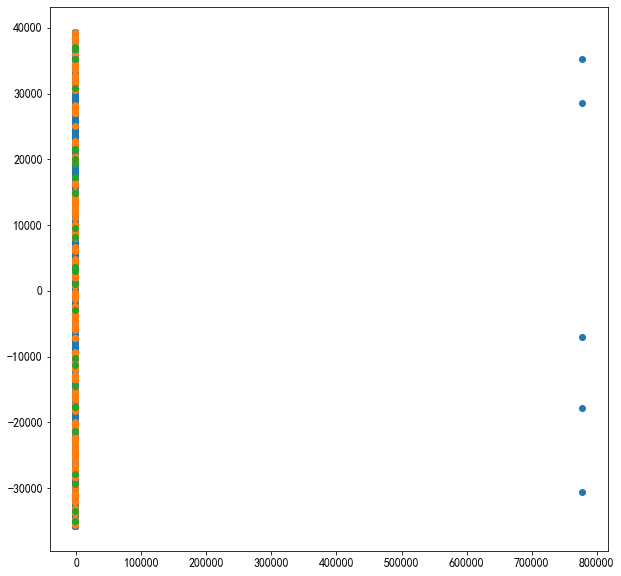

In [26]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA

# 只举例一个数据
df1 = pd.read_csv('data/第一周内卖出.csv')
data1 = np.array(df1)
# 剩余4个data略
# 。。。
pred0 = list(df1['car_category'])


pca = PCA(n_components=2)  # 输出两维
newData1 = pca.fit_transform(data1)  # 载入N维

x1, y1 = [], []
x2, y2 = [], []
x3, y3 = [], []
for index, value in enumerate(pred0):
    if value == 0:
        x1.append(newData1[index][0])
        y1.append(newData1[index][1])
    elif value == 1:
        x2.append(newData1[index][0])
        y2.append(newData1[index][1])
    elif value == 2:
        x3.append(newData1[index][0])
        y3.append(newData1[index][1])
plt.figure(figsize=(10, 10))
plt.scatter(x1, y1)
plt.scatter(x2, y2)
plt.scatter(x3, y3)
plt.xticks(fontsize=12, fontweight='bold')  # 默认字体大小为10
plt.yticks(fontsize=12, fontweight='bold')
plt.savefig('data/第一周卖出的数据分布.png')
plt.show()
# 分类效果不是特别好，此处可改进



# 3 回归分析

## 3.1 多元回归方程拟合

In [27]:
import pandas as pd
import numpy as np
# 此处只
week1_data_1 = pd.read_csv('data/第一周内卖出.csv')
# 回归低端车的方程
category1_data = week1_data_1[week1_data_1['car_category']==0]

X1 = category1_data
y1  = category1_data['price']
del X1['price']



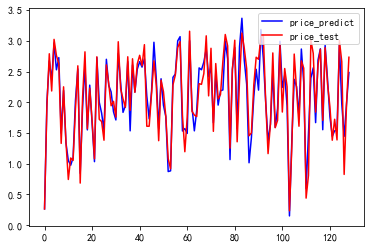

In [28]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt 
X_train,X_test,y_train,y_test=train_test_split(X1,y1,test_size=.9,random_state=0)
linreg=LinearRegression()
model=linreg.fit(X_train,y_train)
y_pred=linreg.predict(X_test)

plt.figure()
plt.plot(range(len(y_pred[1:130])),y_pred[1:130],'b',label="price_predict")
plt.plot(range(len(y_pred[1:130])),y_test[1:130],'r',label="price_test")
plt.legend(loc="upper right")
plt.savefig('data/predict.png')
plt.show()



In [29]:
# 输出多元回归方程的系数
import statsmodels.api as sm
X= sm.add_constant(X1)
result = sm.OLS(y1,X1).fit()
result.params

carid                 6.776550e-07
brand                -2.322658e-03
serial               -1.645462e-04
model                -2.798441e-06
mileage              -9.828378e-03
color                -3.297927e-03
cityId               -1.074958e-03
carCode              -9.326688e-03
transferCount        -1.147666e-02
seatings              3.465818e-02
country              -2.811931e-07
maketype              9.823395e-02
modelyear            -4.652486e-03
displacement          4.335335e-02
gearbox               1.402182e-03
oiltype              -1.192972e-01
newprice              8.783072e-01
trans_category       -2.922157e+01
tradeTime_year       -8.181222e-02
tradeTime_month      -7.946845e-03
tradeTime_day        -1.306742e-03
registerDate_year     1.347084e-01
registerDate_month    1.048537e-02
registerDate_day     -2.922157e+01
licenseDate_year     -1.918229e-02
licenseDate_month    -4.768312e-03
licenseDate_day       2.161882e-04
car_category          0.000000e+00
dtype: float64

## 3.2 回归第二周的价格

In [30]:
# 用第一周的方程去回归第二周的price
model1 = linreg.fit(X1,y1)

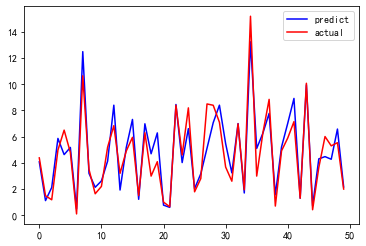

In [31]:
# 第一个类别的回归价格
week2_data_1 = pd.read_csv('data/第二周之内卖出.csv')
category1_data_week2 = week1_data_1[week1_data_1['car_category']==0]
X2 = category1_data_week2
y2  = category1_data_week2['price']
del X2['price']
cluter1_price = model1.predict(X2)
x = range(50)
plt.plot(x,np.expm1(cluter1_price[0:50]),color='b',label='predict')
plt.plot(x,np.expm1(y2[0:50]),color='r',label='actual')
plt.legend()
plt.savefig('data/第二周predict.png')